<a href="https://www.kaggle.com/code/shreshthvashisht/waterquality?scriptVersionId=215314518" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.nn import Linear, ReLU, BCELoss, Sequential,MSELoss,CrossEntropyLoss, LeakyReLU, BatchNorm1d, Dropout, Softmax
from torch.utils.data import TensorDataset,DataLoader
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,f1_score
from sklearn.preprocessing import LabelEncoder,StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('/kaggle/input/wellwaterquality/WknaT6YxR02YeXYuMDPg_water_quality.csv')

In [3]:
df.head()

,Well_ID,State,District,Block,Village,Latitude,Longitude,Year,pH,EC,...,NO3,TH,Ca,Mg,Na,K,F,TDS,WQI,Water Quality Classification
0,W232200071580001,Gujarat,Ahmedabad,Mandal,Dalod,NaN,NaN,2020,8.20,16640.0,...,26.00,1451.0,152.0,260.0,3535.0,45.0,1.00,11149,4361.44080,Unsuitable for Drinking
1,W254029084355301,Himachal Pradesh,Solan,Nallagarh,JAGATPUR,31.1594,76.678500,2019,8.44,299.0,...,2.70,84.0,17.0,10.0,39.0,2.4,0.20,262,85.80466,Good
2,W193530074180001,Maharashtra,Ahmednagar,SANGAMNER,Kokangaon,74.3000,19.591667,2022,7.90,1315.0,...,18.20,465.0,80.2,64.4,88.3,1.6,0.53,372,280.04130,Very Poor yet Drinkable
3,W231620072033001,Gujarat,Ahmedabad,Viramgam,Endla,NaN,NaN,2020,7.40,715.0,...,0.23,280.0,56.0,34.0,47.0,11.0,0.46,479,195.11649,Poor
4,W251908084361501,Himachal Pradesh,Solan,Nallagarh,BARUNA,31.1540,76.638400,2019,8.40,270.0,...,10.00,116.0,10.0,18.0,23.0,1.0,0.12,262,81.77860,Good


# Data Pre-Processing

In [4]:
df.isnull().sum()

Well_ID                         3785
State                              0
District                           0
Block                           1119
Village                            1
Latitude                         389
Longitude                        390
Year                               0
pH                                 0
EC                                 0
CO3                                0
HCO3                               0
Cl                                 0
SO4                                0
NO3                                0
TH                                 0
Ca                                 0
Mg                                 0
Na                                 0
K                                  0
F                                  0
TDS                                0
WQI                                0
Water Quality Classification       0
dtype: int64

<Figure size 2200x21200 with 0 Axes>

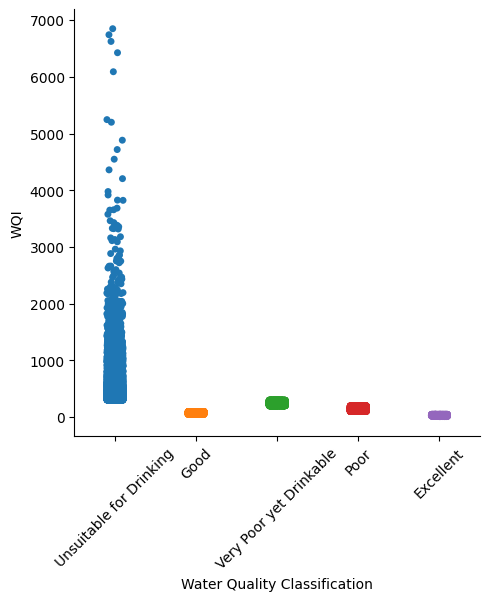

In [5]:
plt.figure(figsize=(22,212))
sns.catplot(x=df['Water Quality Classification'],y=df.WQI,hue=df['Water Quality Classification'])
plt.xticks(rotation=45)
plt.show()

Since the physical and chemical properties are the ones which will decide the property, therefore dropping the categorical columns and longitude, latitude and year

In [6]:
df.select_dtypes(include='O').columns

Index(['Well_ID', 'State', 'District', 'Block', 'Village',
       'Water Quality Classification'],
      dtype='object')

In [7]:
df.drop(['Well_ID', 'State', 'District', 'Block', 'Village','Latitude','Longitude','Year'],axis=1,inplace=True)

In [8]:
df.head()

,pH,EC,CO3,HCO3,Cl,SO4,NO3,TH,Ca,Mg,Na,K,F,TDS,WQI,Water Quality Classification
0,8.20,16640.0,0.0,1257.0,5176.0,822.0,26.00,1451.0,152.0,260.0,3535.0,45.0,1.00,11149,4361.44080,Unsuitable for Drinking
1,8.44,299.0,43.0,87.0,21.0,0.0,2.70,84.0,17.0,10.0,39.0,2.4,0.20,262,85.80466,Good
2,7.90,1315.0,0.0,518.7,120.5,61.6,18.20,465.0,80.2,64.4,88.3,1.6,0.53,372,280.04130,Very Poor yet Drinkable
3,7.40,715.0,0.0,354.0,50.0,18.0,0.23,280.0,56.0,34.0,47.0,11.0,0.46,479,195.11649,Poor
4,8.40,270.0,43.0,87.0,14.0,0.0,10.00,116.0,10.0,18.0,23.0,1.0,0.12,262,81.77860,Good


In [9]:
df.isnull().sum()

pH                              0
EC                              0
CO3                             0
HCO3                            0
Cl                              0
SO4                             0
NO3                             0
TH                              0
Ca                              0
Mg                              0
Na                              0
K                               0
F                               0
TDS                             0
WQI                             0
Water Quality Classification    0
dtype: int64

In [10]:
x=df.drop(['WQI','Water Quality Classification'],axis=1)
y=df[['WQI','Water Quality Classification']]

In [11]:
x.shape,y.shape

((19029, 14), (19029, 2))

# Splitting and Transforming Data

In [12]:
x_tr,x_val,y_tr,y_val=train_test_split(x,y,test_size=0.3,stratify=y['Water Quality Classification'],random_state=2)

In [13]:
y_tr['Water Quality Classification'].value_counts(normalize=True)

Water Quality Classification
Unsuitable for Drinking    0.347297
Poor                       0.279429
Very Poor yet Drinkable    0.247447
Good                       0.085736
Excellent                  0.040090
Name: proportion, dtype: float64

In [14]:
y_val['Water Quality Classification'].value_counts(normalize=True)

Water Quality Classification
Unsuitable for Drinking    0.347171
Poor                       0.279383
Very Poor yet Drinkable    0.247504
Good                       0.085829
Excellent                  0.040112
Name: proportion, dtype: float64

In [15]:
ss1=StandardScaler()
x_tr_ss=ss1.fit_transform(x_tr)
x_val_ss=ss1.transform(x_val)

In [16]:
ss2=StandardScaler()
y_tr_reg=ss2.fit_transform(pd.DataFrame(y_tr['WQI']))
y_val_reg=ss2.transform(pd.DataFrame(y_val['WQI']))

In [17]:
ll=LabelEncoder()
y_tr_clf=ll.fit_transform(y_tr['Water Quality Classification'])
y_val_clf=ll.transform(y_val['Water Quality Classification'])

In [18]:
ll.classes_

array(['Excellent', 'Good', 'Poor', 'Unsuitable for Drinking',
       'Very Poor yet Drinkable'], dtype=object)

In [19]:
x_tr_ss.shape,y_tr_reg.shape,y_tr_clf.shape,x_val_ss.shape,y_val_reg.shape,y_val_clf.shape

((13320, 14), (13320, 1), (13320,), (5709, 14), (5709, 1), (5709,))

In [20]:
X_tr_ss=torch.FloatTensor(x_tr_ss)
Y_tr_reg=torch.FloatTensor(y_tr_reg)
Y_tr_clf=torch.LongTensor(y_tr_clf)
X_val_ss=torch.FloatTensor(x_val_ss)
Y_val_reg=torch.FloatTensor(y_val_reg)
Y_val_clf=torch.LongTensor(y_val_clf)

In [21]:
X_tr_ss.shape,Y_tr_reg.shape,Y_tr_clf.shape,X_val_ss.shape,Y_val_reg.shape,Y_val_clf.shape

(torch.Size([13320, 14]),
 torch.Size([13320, 1]),
 torch.Size([13320]),
 torch.Size([5709, 14]),
 torch.Size([5709, 1]),
 torch.Size([5709]))

# Defining both Architechtures

In [22]:
class Net_Reg(nn.Module):
    def __init__(self):
        super(Net_Reg,self).__init__()
        self.linear_layers=Sequential(
            Linear(X_tr_ss.shape[1],256),
            ReLU(),
            Dropout(0.5),
            BatchNorm1d(256),
            Linear(256,128),
            Dropout(0.5),
            BatchNorm1d(128),
            Linear(128,64),
            LeakyReLU(),
            Dropout(0.5),
            BatchNorm1d(64),
            Linear(64,1)
        )
    def forward(self,x):
       x=self.linear_layers(x) 
       return x 


In [23]:
torch.manual_seed(32)

In [24]:
model_reg=Net_Reg()

Testing if there is any issue with the architechture

In [25]:
X_tr_ss[0]

tensor([ 0.1719,  1.3276, -0.2161,  2.4020,  0.6328,  1.0345,  0.4834,  0.1950,
        -0.3418,  0.5472,  1.7343, -0.1679,  0.4191,  0.5206])

In [26]:
model_reg(X_tr_ss[0:2])

tensor([[ 0.2584],
        [-0.1547]], grad_fn=<AddmmBackward0>)

The architechture is fine

In [27]:
class Net_Clf(nn.Module):
    def __init__(self):
        super(Net_Clf,self).__init__()
        self.linear_layers=Sequential(
            Linear(X_tr_ss.shape[1],256),
            ReLU(),
            Dropout(0.5),
            BatchNorm1d(256),
            Linear(256,128),
            Dropout(0.5),
            BatchNorm1d(128),
            Linear(128,64),
            LeakyReLU(),
            Dropout(0.5),
            BatchNorm1d(64),
            Linear(64,5),
            Softmax(dim=1)
        )
    def forward(self,x):
       x=self.linear_layers(x) 
       return x 


In [28]:
model_clf=Net_Clf()

Testing if there is any issue with the architechture

In [29]:
X_tr_ss[0]

tensor([ 0.1719,  1.3276, -0.2161,  2.4020,  0.6328,  1.0345,  0.4834,  0.1950,
        -0.3418,  0.5472,  1.7343, -0.1679,  0.4191,  0.5206])

In [30]:
model_clf(X_tr_ss[0:2])

tensor([[0.0913, 0.1351, 0.3905, 0.3079, 0.0753],
        [0.3016, 0.2249, 0.0618, 0.0651, 0.3467]], grad_fn=<SoftmaxBackward0>)

The architechture is fine

# Creating Functions

In [31]:
optimizer_reg=Adam(model_reg.parameters(),lr=0.01)
optimizer_clf=Adam(model_clf.parameters(),lr=0.01)
criteria_clf=CrossEntropyLoss()
criteria_reg=MSELoss()

In [32]:
def clf_f1(y,preds):
    return f1_score(y,preds.reshape(-1,1),average='weighted')

In [33]:
def reg_mse(y,preds):
    mse=torch.pow(y-preds,2)
    return torch.sqrt(torch.mean(mse))

In [34]:
def train_clf(x,y,batch_size=64):
    model_clf.train()
    train_data=TensorDataset(x,y)
    train_loader=DataLoader(train_data,batch_size=batch_size,shuffle=True)
    epoch_loss, epoch_acc= 0, 0
    no_of_batches = 0
    
    for x_batch,y_batch in train_loader:
        optimizer_clf.zero_grad()
        preds=model_clf(x_batch)
        corrected_preds=torch.argmax(preds,dim=1)
        #print(corrected_preds)
        loss=criteria_clf(preds,y_batch)
        acc=clf_f1(y_batch,corrected_preds)
        loss.backward()
        optimizer_clf.step()
        epoch_loss+=loss.item()
        epoch_acc+=acc.item()
        no_of_batches+=1
    return epoch_loss/no_of_batches, epoch_acc/no_of_batches   
            

In [35]:
def evaluate_clf(x,y,batch_size=64):
    model_clf.eval()
    train_data=TensorDataset(x,y)
    train_loader=DataLoader(train_data,batch_size=batch_size,shuffle=True)
    epoch_loss, epoch_acc= 0, 0
    no_of_batches = 0
    with torch.no_grad():
        for x_batch,y_batch in train_loader:
            optimizer_clf.zero_grad()
            preds=model_clf(x_batch)
            corrected_preds=torch.argmax(preds,dim=1)
            #print(corrected_preds)
            loss=criteria_clf(preds,y_batch)
            acc=clf_f1(y_batch,corrected_preds)
            epoch_loss+=loss.item()
            epoch_acc+=acc.item()
            no_of_batches+=1
    return epoch_loss/no_of_batches, epoch_acc/no_of_batches   
              

In [36]:
def predict_clf(x):
    model_clf.eval()
    predictions=[]
    preds=model_clf(x)
    corrected_preds=torch.argmax(preds,dim=1)
    predictions.append(ll.inverse_transform(corrected_preds))
    np.concatenate(predictions,axis=0)
    return predictions

In [37]:
def train_reg(x,y,batch_size=64):
    model_reg.train()
    train_data=TensorDataset(x,y)
    train_loader=DataLoader(train_data,batch_size=batch_size,shuffle=True)
    epoch_loss, epoch_acc= 0, 0
    no_of_batches = 0
    
    for x_batch,y_batch in train_loader:
        optimizer_reg.zero_grad()
        preds=model_reg(x_batch)
        loss=criteria_reg(preds,y_batch)
        acc=reg_mse(y_batch,preds)
        loss.backward()
        optimizer_reg.step()
        epoch_loss+=loss.item()
        epoch_acc+=acc.item()
        no_of_batches+=1
    return epoch_loss/no_of_batches, epoch_acc/no_of_batches   


In [38]:
def evaluate_reg(x,y,batch_size=64):
    model_reg.eval()
    train_data=TensorDataset(x,y)
    train_loader=DataLoader(train_data,batch_size=batch_size,shuffle=True)
    epoch_loss, epoch_acc= 0, 0
    no_of_batches = 0
    with torch.no_grad():
        for x_batch,y_batch in train_loader:
            optimizer_reg.zero_grad()
            preds=model_reg(x_batch)
            loss=criteria_reg(preds,y_batch)
            acc=reg_mse(y_batch,preds)
            epoch_loss+=loss.item()
            epoch_acc+=acc.item()
            no_of_batches+=1
    return epoch_loss/no_of_batches, epoch_acc/no_of_batches   
    

In [39]:
def predict_reg(x):
    model_reg.eval()
    predictions=[]
    preds=model_reg(x)
    predictions.append(ss2.inverse_transform(preds.detach().numpy()))
    np.concatenate(predictions,axis=0)
    return predictions

# Fitting, Evaluating and Loading the best Weights

In [40]:
def run_clf(epochs=50,batch_size=64):
    tl=[]
    ta=[]
    vl=[]
    va=[]
    best_acc=float("-inf")
    for e in range(epochs):
        train_loss,train_acc=train_clf(X_tr_ss,Y_tr_clf)
        val_loss,val_acc=evaluate_clf(X_val_ss,Y_val_clf)
        print("\nEpoch:",e+1)
        print("  Train Loss:",train_loss)
        print("\tTrain Acc:",train_acc)
        print("\tValidation Loss:",val_loss)
        print("\tValidation Acc:",val_acc)
        tl.append(round(train_loss,2))
        ta.append(round(train_acc,2))
        vl.append(round(val_loss,2))
        va.append(round(val_acc,2))
        if best_acc<=val_acc:
            best_acc=val_acc
            torch.save(model_clf.state_dict(), 'saved_weights_clf.pt') 
            print("\n----------------------------------------------------Saved best model------------------------------------------------------------------")   
    #print(tl,ta,vl,va)
    plt.plot(range(epochs),tl,label="Train Loss")
    plt.plot(range(epochs),vl,label="Val Loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Cross Entropy Loss")
    plt.legend(loc='best')
    plt.show()
    plt.plot(range(epochs),ta,label="Train Acc")
    plt.plot(range(epochs),va,label="Val Acc")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("F1 Score")
    plt.legend(loc='best')
    plt.show()    


Epoch: 1
  Train Loss: 1.143618993211591
	Train Acc: 0.7496126429765045
	Validation Loss: 1.027313862906562
	Validation Acc: 0.8634022627304099

----------------------------------------------------Saved best model------------------------------------------------------------------

Epoch: 2
  Train Loss: 1.0868413861858788
	Train Acc: 0.8048276657351889
	Validation Loss: 1.0223421348465813
	Validation Acc: 0.8700121803550571

----------------------------------------------------Saved best model------------------------------------------------------------------

Epoch: 3
  Train Loss: 1.0641446284700238
	Train Acc: 0.8279023519028205
	Validation Loss: 1.011954090330336
	Validation Acc: 0.8759138997322885

----------------------------------------------------Saved best model------------------------------------------------------------------

Epoch: 4
  Train Loss: 1.0655674771829085
	Train Acc: 0.8261034522824621
	Validation Loss: 1.0586544268661076
	Validation Acc: 0.8354688827822053

Epoch:

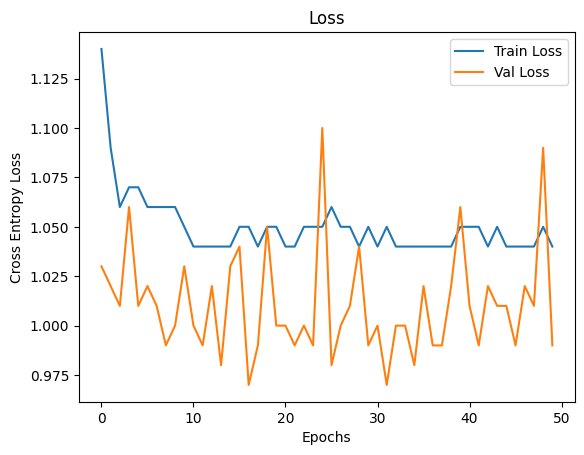

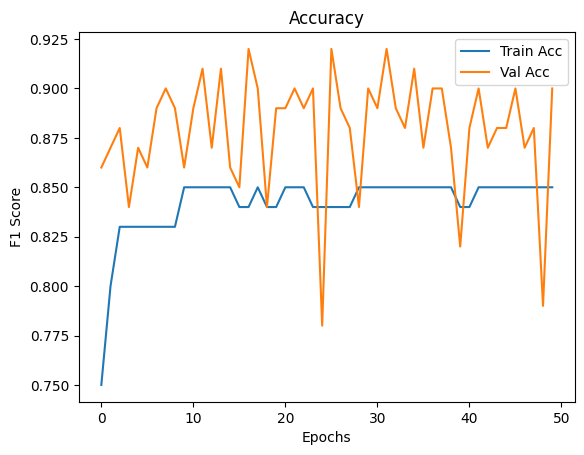

In [41]:
run_clf(epochs=50)

In [42]:
def run_reg(epochs=50,batch_size=64):
    tl=[]
    ta=[]
    vl=[]
    va=[]
    least_error=float("inf")
    for e in range(epochs):
        train_loss,train_acc=train_reg(X_tr_ss,Y_tr_reg)
        val_loss,val_acc=evaluate_reg(X_val_ss,Y_val_reg)
        print("\nEpoch:",e+1)
        print("  Train Loss:",train_loss)
        print("\tTrain Acc:",train_acc)
        print("\tValidation Loss:",val_loss)
        print("\tValidation Acc:",val_acc)
        tl.append(round(train_loss,2))
        ta.append(round(train_acc,2))
        vl.append(round(val_loss,2))
        va.append(round(val_acc,2))
        if least_error>=val_acc:
            least_error=val_acc
            torch.save(model_reg.state_dict(), 'saved_weights_reg.pt') 
            print("\n----------------------------------------------------Saved best model------------------------------------------------------------------")   
    #print(tl,ta,vl,va)
    plt.plot(range(epochs),tl,label="Train Loss")
    plt.plot(range(epochs),vl,label="Val Loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Mean Suared Error Loss")
    plt.legend(loc='best')
    plt.show()
    plt.plot(range(epochs),ta,label="Train Acc")
    plt.plot(range(epochs),va,label="Val Acc")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("RMSE")
    plt.legend(loc='best')
    plt.show()    


Epoch: 1
  Train Loss: 0.37594826271730747
	Train Acc: 0.5249177192529423
	Validation Loss: 0.144716130486793
	Validation Acc: 0.29892135469449893

----------------------------------------------------Saved best model------------------------------------------------------------------

Epoch: 2
  Train Loss: 0.31860070504497684
	Train Acc: 0.4794670678496931
	Validation Loss: 0.1118782712974482
	Validation Acc: 0.23852812722325326

----------------------------------------------------Saved best model------------------------------------------------------------------

Epoch: 3
  Train Loss: 0.3064180160003701
	Train Acc: 0.4690937566700164
	Validation Loss: 2.0150696508172485
	Validation Acc: 0.7195308132304086

Epoch: 4
  Train Loss: 0.2977064999809676
	Train Acc: 0.4549576240150552
	Validation Loss: 0.6572172531858087
	Validation Acc: 0.46497167100509007

Epoch: 5
  Train Loss: 0.3089248489000295
	Train Acc: 0.453520429048812
	Validation Loss: 2.916577168429891
	Validation Acc: 0.91607445

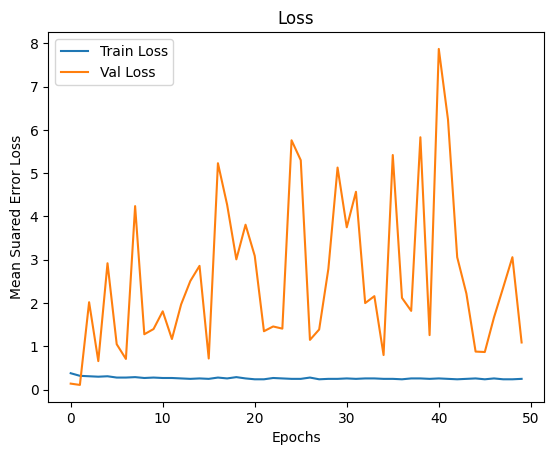

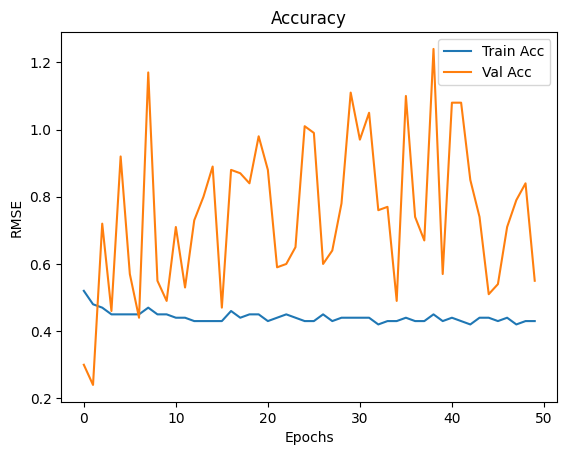

In [43]:
run_reg(epochs=50)

In [44]:
model_clf.load_state_dict(torch.load('saved_weights_clf.pt'))
predictions_clf=predict_clf(X_val_ss)
model_reg.load_state_dict(torch.load('saved_weights_reg.pt'))
predictions_reg=predict_reg(X_val_ss)

In [45]:
predictions_clf

[array(['Poor', 'Good', 'Good', ..., 'Unsuitable for Drinking', 'Poor',
        'Unsuitable for Drinking'], dtype=object)]

In [46]:
predictions_reg

[array([[143.01414],
        [125.19445],
        [ 85.03072],
        ...,
        [331.88672],
        [161.35457],
        [317.36984]], dtype=float32)]